<a href="https://colab.research.google.com/github/ishank-juneja/colab-notebooks/blob/master/basic_conc_inequalities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The 3 inequalities implemented here
1. Markov Inequality
    $$\mathbf{P}(X > \alpha) \leq \frac{\mathbf{E}[X]}{\alpha}$$
2.Chebychev Inequality
    $$\mathbf{P}(|X - \mu| > \alpha) \leq \frac{var(X)}{\alpha^2}$$
3. Chernoff Bound 
    $$\mathbf{P}(X > \alpha) \leq \frac{\mathbf{E}[e^{sX}]}{e^{s\alpha}} \quad \forall \, s > 0$$
    Reformulating, the bound can be written as, 
    $$\mathbf{P}(X > \alpha) \leq \exp(-\psi^*_X(\alpha)) \quad \forall \, s > 0$$
    Where for the tightest bound, $\psi^*_X(\alpha)$ is given by,
    $$\psi^*_X(\alpha) = \sup_{s>0} \,\, s\alpha - \log(\mathbf{E}[e^{sX}])$$      


Relations for Exponential Random Variable 

It is known that when,
    
$X \thicksim \exp(\lambda)$        
$\mathbf{E}[X] = \frac{1}{\lambda}$
and
${var}(X) = \frac{1}{\lambda^2}$
1. Markov Inequality Reduces to
    $$\mathbf{P}(X > \alpha) \leq \frac{1}{\lambda\alpha}$$
2. Chebychev Inequality reduces to
    $$\mathbf{P}(|X - \mu| > \alpha) \leq \frac{1}{\lambda^2\alpha^2}$$
3. After finding supremum of $\psi^*_X(\alpha) = s\alpha - \log(\frac{\lambda}{\lambda - s}) \,$ over the interval $\,\, 0 < s < \lambda$, Chernoff bound becomes
    $$\mathbf{P}(X > \alpha) \leq \exp(1+\log(\lambda\alpha) - \lambda\alpha)$$


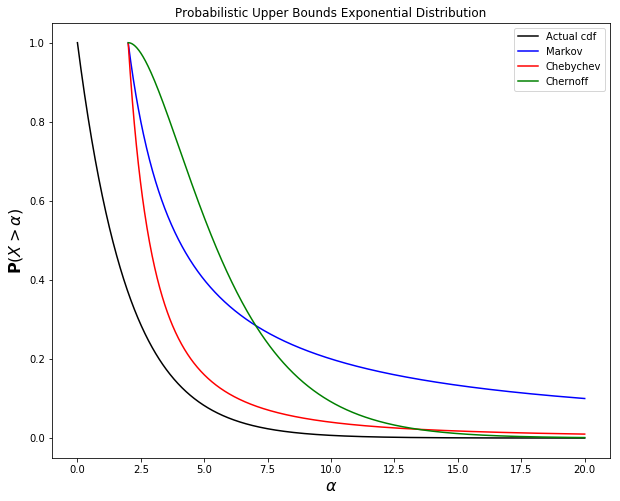

In [0]:
# Purpose: plotting Markov, Chebychev and Chernoff
# Inequalities for Exponential and Poisson Random variable
# Author: Ishank Juneja


# imports
import numpy as np
from scipy.stats import expon
from matplotlib import pyplot as plt


# User parameters
# For exponential random variable
BETA = 2    # = 1/lambda
# Number of points to plot over
NPTS = 1000 
# Labels 
LABELS = ['Actual cdf', 'Markov', 'Chebychev', 'Chernoff']


# Vector for plotting curves
alpha = np.linspace(0, 20, NPTS)
# Declare unshifted exponential random variable
exprv = expon(0, BETA)
# Function that gives exact prob of rv > x
exp_actual = 1 - exprv.cdf(alpha)
# Markov inequality samples for exponential rv
exp_markov = BETA*1/alpha[NPTS//10:]
# Chebychev inequality
exp_chebychev = BETA**2/alpha[NPTS//10:]**2
# Chernoff bound 
# Assign optimal value of s for each alpha
s = 1/BETA -1/alpha[NPTS//10:]
# Get exponent of RHS
psi = s*alpha[NPTS//10:] - np.log(1/BETA*1/(1/BETA - s))
# Get samples
exp_chernoff = np.exp(-psi)    
# Add results to plot and format area
plt.figure(figsize=(10, 8))
plt.plot(alpha, exp_actual, color='k')
plt.plot(alpha[NPTS//10:], exp_markov, color='b')
plt.plot(alpha[NPTS//10:], exp_chebychev, color='r')
plt.plot(alpha[NPTS//10:], exp_chernoff, color='g')
plt.xlabel(r"$\alpha$", size=16)
plt.ylabel(r"$\mathbf{P}(X > \alpha)$", size=16)
plt.title("Probabilistic Upper Bounds Exponential Distribution")
plt.legend(LABELS)
plt.show()

Relations for Poisson Random Variable 

It is known that when,
    
$X \thicksim poisson(\lambda)$        
$\mathbf{E}[X] = \lambda$
and
${var}(X) = \lambda$
1. Markov Inequality Reduces to
    $$\mathbf{P}(X > \alpha) \leq \frac{\lambda}{\alpha}$$
2. Chebychev Inequality reduces to
    $$\mathbf{P}(|X - \mu| > \alpha) \leq \frac{\lambda}{\alpha^2}$$
3. After finding supremum of $\psi^*_X(\alpha) = s\alpha - \lambda(e^s-1) \,$ for $\,\, s > 0$, Chernoff bound becomes
    $$\mathbf{P}(X > \alpha) \leq \exp(\alpha(1 + \log\frac{\lambda}{\alpha})-\lambda) \quad \forall \, \alpha > \lambda $$
    Here the additional condition is required because $s^* = \log\frac{\alpha}{\lambda}$ and $s > 0$ for inequality to be true


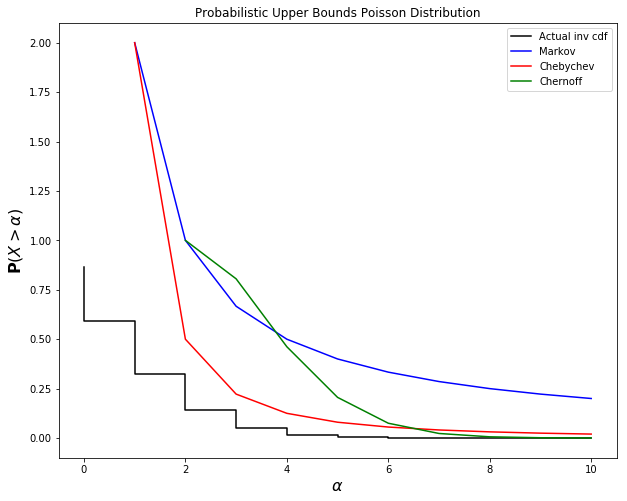

In [0]:
# Purpose: plotting Markov, Chebychev and Chernoff
# Inequalities for Exponential and Poisson Random variable
# Author: Ishank Juneja


# imports
import numpy as np
from scipy.stats import poisson
from matplotlib import pyplot as plt


# User parameters
# For Poisson random variable
LAMBDA = 2  # mean of poisson RV, usually lambda
# Number of points to plot over
NPTS = 10
# Labels 
LABELS = ['Actual inv cdf', 'Markov', 'Chebychev', 'Chernoff']


# Vector for plotting curves
alpha = np.linspace(0, NPTS, NPTS+1)
# Declare unshifted exponential random variable
poissonrv = poisson(LAMBDA)
# Function that gives exact prob of rv > x
poiss_actual = 1 - poissonrv.cdf(alpha)
# Markov inequality samples for exponential rv
poiss_markov = LAMBDA*1/alpha[NPTS//10:]
# Chebychev inequality
poiss_chebychev = LAMBDA/alpha[NPTS//10:]**2
# Chernoff bound 
# Assign optimal value of s for each alpha
# To fit assumption s > 0
alpha_trunc = alpha[alpha >= LAMBDA]
s = np.log(alpha_trunc/LAMBDA)
# Get exponent of RHS
psi = s*alpha_trunc - LAMBDA*(np.exp(s) - 1)
# Get samples
poiss_chernoff = np.exp(-psi)    
# Add results to plot and format area
plt.figure(figsize=(10, 8))
plt.step(alpha, poiss_actual, color='k')
plt.plot(alpha[NPTS//10:], poiss_markov, color='b')
plt.plot(alpha[NPTS//10:], poiss_chebychev, color='r')
plt.plot(alpha_trunc, poiss_chernoff, color='g')
plt.xlabel(r"$\alpha$", size=16)
plt.ylabel(r"$\mathbf{P}(X > \alpha)$", size=16)
plt.title("Probabilistic Upper Bounds Poisson Distribution")
plt.legend(LABELS)
plt.show()